### Logistic Regression 2


### Topic 1: Confusion Matrix

### Topic 1: Confusion Matrix
A confusion matrix is a 2×2 table that summarizes how well a classification model performs.
It compares actual vs predicted classes.

True Negative (TN)
False Positive (FP)

False Negative (FN)
True Positive (TP)

Why is it useful?

Accuracy alone can be misleading (e.g., if classes are imbalanced).

Confusion matrix tells us where the model makes mistakes:

More FP → model gives too many false alarms

More FN → model misses real positives (dangerous in medical diagnosis!)

### 1. Accuracy Out of all predictions, how many were correct?”
= TP+TN / total

### Precision : When the model predicts Survived, how often is it correct?”


= TP / TP + FP

### Recall (a.k.a Sensitivity)

👉 “Out of all the people who actually Survived, how many did the model correctly catch?”

= TP / TP + FN

### 4. F1-Score
Balance between Precision and Recall.

= 2⋅(Precision⋅Recall) / Precision + recall

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load Titanic dataset
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Keep only useful columns
df = titanic[["survived", "age", "sex", "pclass"]].dropna()

# Convert 'sex' to numeric (male=0, female=1)
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Features and target
X = df[["age", "sex", "pclass"]]
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       126
           1       0.72      0.70      0.71        89

    accuracy                           0.76       215
   macro avg       0.76      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



### Precision vs Recall in Simple Words
1. Precision = “When I say YES, am I right?”

Focus: quality of positive predictions.

Formula: TP / (TP + FP)

👉 Example: Spam Filter

Precision = Out of all emails marked as spam, how many are really spam?

If Precision is low → many important emails (not spam) end up in spam folder ❌.

2. Recall = “Did I catch all the real YES cases?”

Focus: coverage of actual positives.

Formula: TP / (TP + FN)

👉 Example: Medical Test for Cancer

Recall = Out of all people who actually have cancer, how many did the test correctly find?

If Recall is low → sick people go undetected ❌ (dangerous).

Titanic Example

Precision (survivors = YES) = Out of all predicted survivors, how many really survived?

Recall (survivors = YES) = Out of all real survivors, how many did we catch?

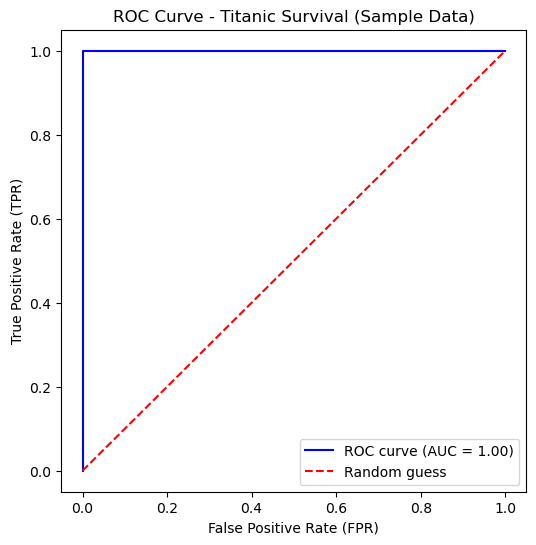

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Titanic-like dataset (small sample)
# -----------------------------
data = {
    "sex": [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],  # 0 = male, 1 = female
    "age": [22, 38, 26, 35, 29, 42, 50, 30, 19, 60],
    "pclass": [3, 1, 3, 1, 2, 3, 1, 2, 3, 1],  # Ticket class
    "survived": [0, 1, 1, 1, 1, 0, 0, 1, 1, 0],  # Target
}
df = pd.DataFrame(data)

# -----------------------------
# Step 2: Split data
# -----------------------------
X = df[["sex", "age", "pclass"]]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 3: Train Logistic Regression
# -----------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Predict probabilities
# -----------------------------
y_prob = model.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 5: Calculate ROC curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# -----------------------------
# Step 6: Plot ROC curve
# -----------------------------
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Titanic Survival (Sample Data)")
plt.legend(loc="lower right")
plt.show()


### What is ROC Curve?

ROC = Receiver Operating Characteristic
It’s a graph that shows how good your model is at separating the two classes (e.g., Survived vs Died).

X-axis = False Positive Rate (FPR)

Y-axis = True Positive Rate (TPR) = Recall

Each point on the curve = performance at a different threshold.

ROC curve shows how TPR and FPR change when we move this threshold.

AUC

AUC = Area under the ROC curve.

AUC tells us how well the model separates the two groups (Survived vs Died).


### Real-World Analogy

Imagine a medical test for a disease.

If you make the test very sensitive (cutoff low), you’ll catch all sick people (high Recall), but you’ll also wrongly scare many healthy people (high False Positives).

If you make the test very strict (cutoff high), you’ll avoid false alarms, but you’ll miss real patients.

👉 ROC curve shows all possible balances between catching patients and making false alarms.
👉 AUC tells how good the test is overall.

### 3. The blue ROC curve

Shows how your model performs at different cutoffs.

The more the curve bows towards the top-left corner, the better the model.

👉 Top-left = perfect model:

FPR = 0 (no false alarms)

TPR = 1 (catches all positives)

### 4. AUC (Area Under Curve)

AUC = the area under the blue curve.

Range:

0.5 → Model is no better than guessing.

0.7 – 0.8 → Decent model.

0.8 – 0.9 → Very good model.

> 0.9 → Excellent model.

👉 Example: Titanic Logistic Regression ~ 0.78 AUC → Model is good, but not perfect.